In [1]:
print ("b")

b


In [1]:
import os
import pandas as pd

# ---------------------------------------------------
# Définir le chemin vers le dossier principal du dataset
# ---------------------------------------------------
data_dir = r"C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset"

# Liste pour stocker les informations sur chaque image
data = []

# ---------------------------------------------------
# Parcours des sous-dossiers du dataset : COVID, Normal, Viral Pneumonia, Lung_Opacity
# Chaque sous-dossier contient un dossier "images" avec les fichiers image
# ---------------------------------------------------
for category in os.listdir(data_dir):
    folder_images = os.path.join(data_dir, category, "images")  # chemin complet vers le sous-dossier "images"
    
    # Vérifie que le dossier existe
    if os.path.isdir(folder_images):
        # Parcours de tous les fichiers dans le dossier "images"
        for file in os.listdir(folder_images):
            # On ne garde que les fichiers image PNG ou JPG
            if file.endswith(".png") or file.endswith(".jpg"):
                # On ajoute un dictionnaire avec le chemin complet de l'image et sa catégorie
                data.append({
                    "image_path": os.path.join(folder_images, file),
                    "label": category
                })

# ---------------------------------------------------
# Crée un DataFrame pandas à partir de la liste de dictionnaires
# ---------------------------------------------------
df_images = pd.DataFrame(data)

# Affiche les 5 premières lignes du DataFrame pour vérifier
print(df_images.head())

# Affiche le nombre total d'images détectées
print(f"Nombre total d'images : {len(df_images)}")

# ---------------------------------------------------
# Lecture des fichiers metadata Excel pour chaque catégorie
# ---------------------------------------------------
fichiers_metadata = [
    r"C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\COVID.metadata.xlsx",
    r"C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\Normal.metadata.xlsx",
    r"C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\Lung_Opacity.metadata.xlsx",
    r"C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\Viral Pneumonia.metadata.xlsx"
]

# Parcours de chaque fichier metadata
for file in fichiers_metadata:
    df_meta = pd.read_excel(file)  # lecture du fichier Excel
    # Affiche le nom du fichier avec une phrase explicative
    print(f"\nLecture du fichier metadata : {file}")
    
    # Affiche le nombre de valeurs manquantes avec une explication
    na_counts = df_meta.isna().sum()
    print("Nombre de valeurs manquantes (NA) par colonne :")
    print(na_counts)
    
    # Séparateur pour la lisibilité
    print("---" * 10)


                                          image_path  label
0  C:\Users\souad\Desktop\Jeu de donnee\archive\C...  COVID
1  C:\Users\souad\Desktop\Jeu de donnee\archive\C...  COVID
2  C:\Users\souad\Desktop\Jeu de donnee\archive\C...  COVID
3  C:\Users\souad\Desktop\Jeu de donnee\archive\C...  COVID
4  C:\Users\souad\Desktop\Jeu de donnee\archive\C...  COVID
Nombre total d'images : 21165

Lecture du fichier metadata : C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\COVID.metadata.xlsx
Nombre de valeurs manquantes (NA) par colonne :
FILE NAME    0
FORMAT       0
SIZE         0
URL          0
dtype: int64
------------------------------

Lecture du fichier metadata : C:\Users\souad\Desktop\Jeu de donnee\archive\COVID-19_Radiography_Dataset\Normal.metadata.xlsx
Nombre de valeurs manquantes (NA) par colonne :
FILE NAME    0
FORMAT       0
SIZE         0
URL          0
dtype: int64
------------------------------

Lecture du fichier metadata : C:\Users\souad\Desktop\J

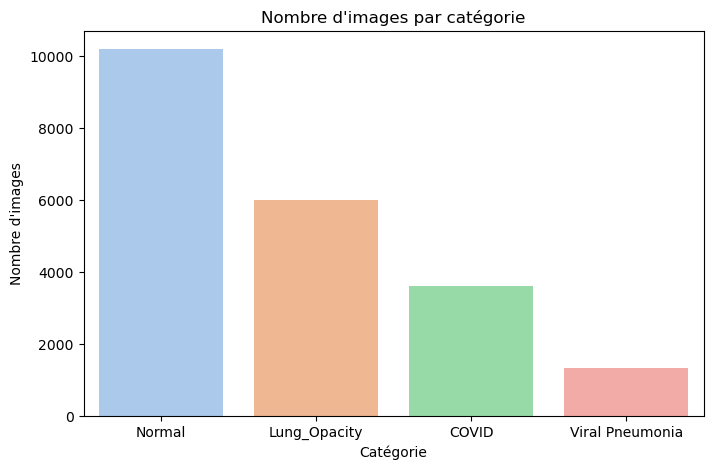

Vérification avec pandas :
label
Normal             10192
Lung_Opacity        6012
COVID               3616
Viral Pneumonia     1345
Name: count, dtype: int64


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 1 : Nombre d'images par catégorie
# ---------------------------------------------------
# Objectif : visualiser la répartition globale du dataset
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
counts = df_images['label'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(
    x=counts.index, 
    y=counts.values, 
    hue=counts.index,      
    palette='pastel', 
    dodge=False,           # pour ne pas décaler les barres
    legend=False           # supprime la légende redondante
)
plt.title("Nombre d'images par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'images")

# Enregistrer le graphique AVANT plt.show()
plt.savefig(os.path.join(save_dir, "graphique_nombreimages_par_categorie.png"), dpi=300)

plt.show()


# Commentaire métier :
# On voit que le dataset n'est pas parfaitement équilibré.
# Normal a beaucoup plus d'images que COVID ou Viral Pneumonia.
# Cela peut impacter l'entraînement d'un modèle de classification.

print("Vérification avec pandas :")
print(df_images['label'].value_counts())






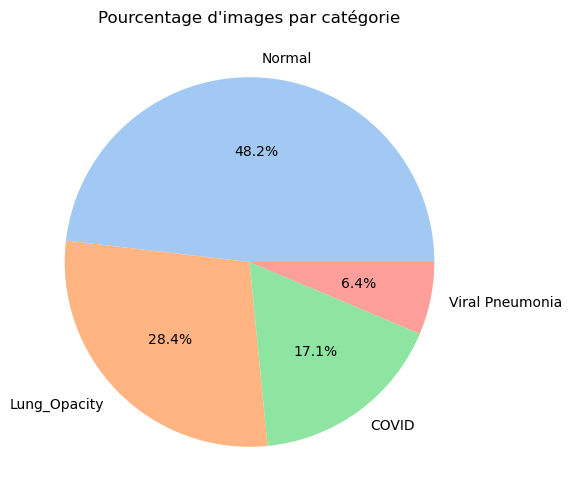

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 2 : Pourcentage d'images par catégorie
# ---------------------------------------------------
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
plt.figure(figsize=(6,6))
df_images['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Pourcentage d'images par catégorie")
plt.ylabel("")  # enlève le label y
plt.savefig(os.path.join(save_dir, "Pourcentage d'images par catégorie"), dpi=300)
plt.show()

# Commentaire métier :
# Le pourcentage montre visuellement le déséquilibre.
# Le graphique montre visuellement le déséquilibre entre les différentes catégories d'images.
# Cela permet d'identifier les classes majoritaires et minoritaires, ce qui est important
# pour comprendre la distribution des données avant d'appliquer un modèle de classification.


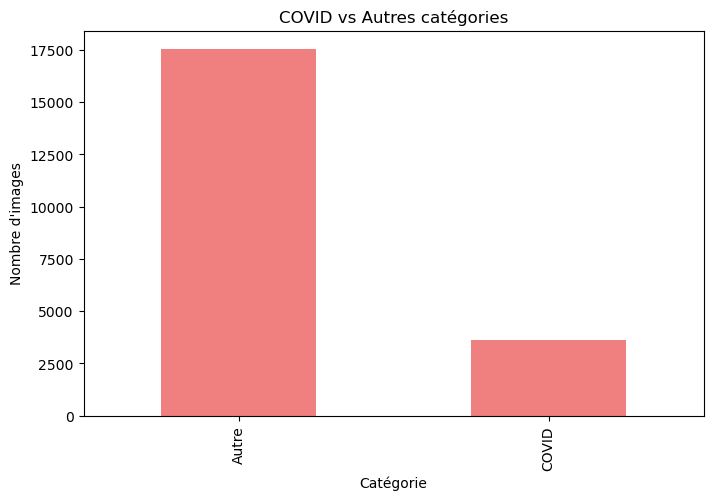

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
# ---------------------------------------------------
# Graphique 3 : Nombre d'images COVID vs les autres catégories
# ---------------------------------------------------
# Objectif : mettre en avant le déséquilibre de COVID
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
plt.figure(figsize=(8,5))
covid_counts = df_images['label'].apply(lambda x: 'COVID' if x=='COVID' else 'Autre')
covid_counts.value_counts().plot(kind='bar', color='lightcoral')
plt.title("COVID vs Autres catégories")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'images")
plt.savefig(os.path.join(save_dir, "COVID vs Autres catégories"), dpi=300)
plt.show()

# La catégorie COVID est minoritaire par rapport aux autres. 
# Sans correction, le modèle pourrait sous-predict les cas COVID, 
# ce qui risque d’affecter la détection des patients à risque.


Nombre d'images en double : 0


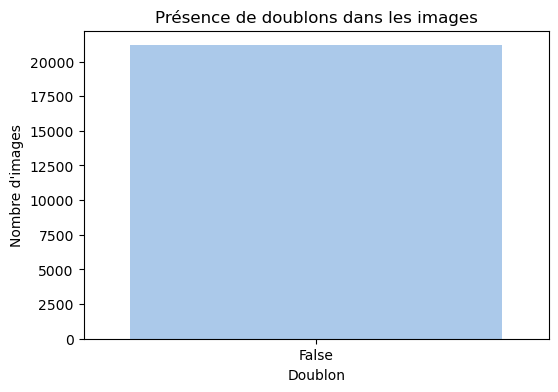

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 4 : Vérification de présence de doublons (images identiques)
# ---------------------------------------------------
# Objectif : vérifier si des fichiers sont identiques
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
duplicate_counts = df_images['image_path'].duplicated().sum()
print(f"Nombre d'images en double : {duplicate_counts}")

# Graphique simple pour visualiser présence/absence de doublons
plt.figure(figsize=(6,4))
sns.countplot(x=df_images['image_path'].duplicated(),
              hue=df_images['image_path'].duplicated(),  
              palette='pastel',
              legend=False)
plt.title("Présence de doublons dans les images")
plt.xlabel("Doublon")
plt.ylabel("Nombre d'images")
plt.savefig(os.path.join(save_dir, "Présence de doublons dans les images"), dpi=300)
plt.show()

# Vérifier la présence de doublons permet de s'assurer que le modèle ne sera pas influencé.
# Si des images identiques apparaissent plusieurs fois, le modèle pourrait "mémoriser" ces exemples
# au lieu d'apprendre de vraies caractéristiques, ce qui réduirait ses performances sur de nouvelles images.
# Ici, la totalité des images sont uniques, ce qui garantit la fiabilité du dataset pour l'entraînement du modèle.



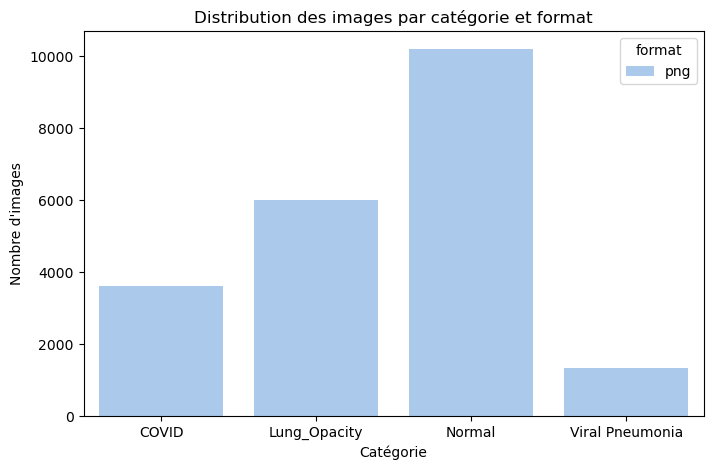

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Graphique 5 : Distribution des images par catégorie et sous-catégorie de format (si PNG/JPG)
# ---------------------------------------------------
# Comme toutes les images sont PNG, on montre quand même un graphique pour vérifier
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"
df_images['format'] = df_images['image_path'].apply(lambda x: x.split('.')[-1])
plt.figure(figsize=(8,5))
sns.countplot(x='label', hue='format', data=df_images, palette='pastel')
plt.title("Distribution des images par catégorie et format")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'images")
plt.savefig(os.path.join(save_dir, "Distribution des images par catégorie et format"), dpi=300)
plt.show()

# Commentaire métier :
# Toutes les images sont au format PNG, donc pas de variabilité de format dans le dataset actuel.
#Cette vérification est importante pour anticiper d’éventuels problèmes si d’autres formats (comme JPG) s’ajoutent à l’avenir.,
# car des formats différents peuvent nécessiter un prétraitement spécifique avant l'entraînement du modèle.


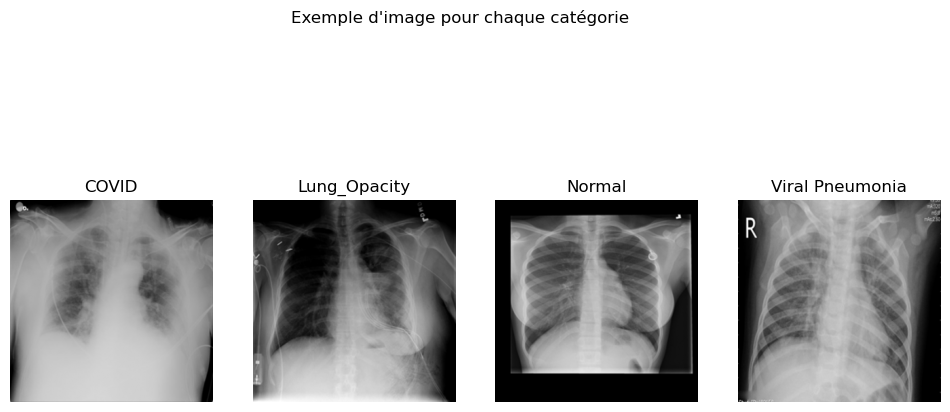

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
save_dir = r"C:\Users\souad\Desktop\graphe  du code covide"

# Sélectionne un exemple d'image pour chaque catégorie
categories = df_images['label'].unique()
exemples = []

for cat in categories:
    exemple_image = df_images[df_images['label'] == cat].iloc[0]['image_path']
    exemples.append((cat, exemple_image))

# Affichage
plt.figure(figsize=(12,6))

for i, (label, img_path) in enumerate(exemples):
    img = mpimg.imread(img_path)
    plt.subplot(1, len(exemples), i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')

plt.suptitle("Exemple d'image pour chaque catégorie")
plt.savefig(os.path.join(save_dir, "Exemple d'image pour chaque catégorie"), dpi=300)
plt.show()



#La visualisation des images représentatives pour chaque catégorie permet de mieux comprendre les différences visuelles entre les cas.
#On remarque que :

#COVID-19 : les radiographies montrent souvent des opacités diffuses, parfois bilatérales, ce qui correspond aux infiltrats pulmonaires typiques du COVID.

#Normal : les images montrent des poumons clairs sans anomalies visibles, ce qui constitue la référence pour la détection des pathologies.

#Lung Opacity (Non-COVID) : ces radiographies présentent des zones d’opacité, indiquant des infections pulmonaires ou inflammations différentes du COVID-19.

#Viral Pneumonia : les images montrent des opacités plus localisées ou des motifs particuliers liés à la pneumonie virale.

#Cette étape est importante pour :

#vérifier la qualité et la représentativité des images dans chaque classe,

#anticiper les difficultés que le modèle pourrait rencontrer pour différencier des classes visuellement similaires,

#sensibiliser à la nécessité de prétraitement (normalisation, redimensionnement, augmentation) pour améliorer la performance du modèle de classification.

In [ ]:
#Nettoyage des données
import os
import pandas as pd
from PIL import Image

# Vérifier les doublons
duplicates = df_images.duplicated(subset='image_path').sum()
print(f"Nombre de doublons : {duplicates}")

# Supprimer les doublons si nécessaire
df_images = df_images.drop_duplicates(subset='image_path')

# Vérifier les valeurs manquantes
print(df_images.isna().sum())

# Vérifier l'ouverture des images
corrupted_images = []
for img_path in df_images['image_path']:
    try:
        img = Image.open(img_path)
        img.verify()  # vérifier si l'image est corrompue
    except (IOError, SyntaxError):
        corrupted_images.append(img_path)

print(f"Images corrompues détectées : {len(corrupted_images)}")
# Supprimer les images corrompues
df_images = df_images[~df_images['image_path'].isin(corrupted_images)]


#Objectif : s’assurer que le dataset est cohérent et exploitable.
# Vérifier et supprimer les doublons.
#Vérifier les valeurs manquantes dans les métadonnées.
#Contrôler la taille et le format des images.
#Détecter les fichiers corrompus.


Forme finale du dataset : (21165, 256, 256, 1)
Type de données : float32
Valeur max : 1.0 Valeur min : 0.0


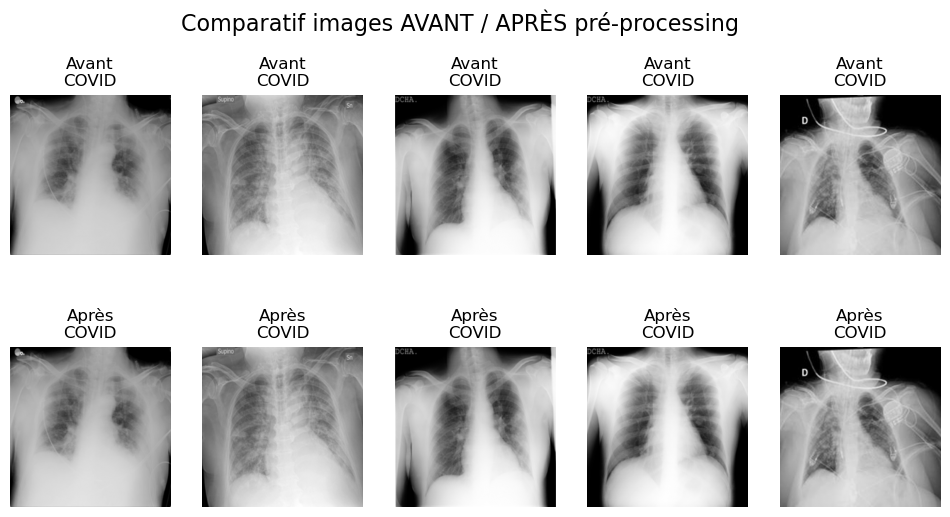

In [12]:
# Normalisation et standardisation des images
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Paramètres de pré-processing
# ---------------------------------------------------
target_size = (256, 256)  # taille cible

def preprocess_image(img_path):
    """
    Convertit l'image en niveaux de gris,
    redimensionne en 256x256
    et normalise entre 0 et 1.
    """
    img = Image.open(img_path).convert('L')  
    img = img.resize(target_size)            # 🔹 Redimensionnement ajouté
    img_array = np.array(img) / 255.0
    return img_array

# ---------------------------------------------------
# Appliquer le pré-processing à toutes les images
# ---------------------------------------------------
preprocessed_images = []

for img_path in df_images['image_path']:
    img_array = preprocess_image(img_path)
    preprocessed_images.append(img_array)

# Conversion en tableau numpy
X = np.array(preprocessed_images, dtype=np.float32)
X = X.reshape(X.shape[0], 256, 256, 1)  # 1 canal car niveaux de gris

print("Forme finale du dataset :", X.shape)  #(nombre d’images, hauteur, largeur, canaux)
print("Type de données :", X.dtype)
print("Valeur max :", X.max(), "Valeur min :", X.min())

# ---------------------------------------------------
# Afficher quelques images AVANT et APRÈS pré-processing
# ---------------------------------------------------
plt.figure(figsize=(12,6))
for i in range(5):
    img_path = df_images['image_path'].iloc[i]

    # Image originale
    img_originale = Image.open(img_path).convert('L')
    img_originale_array = np.array(img_originale)

    # Image pré-traitée
    img_preprocessed = X[i].reshape(256, 256)

    # Affichage côte à côte
    plt.subplot(2, 5, i + 1)
    plt.imshow(img_originale_array, cmap='gray')
    plt.title(f"Avant\n{df_images['label'].iloc[i]}")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(img_preprocessed, cmap='gray')
    plt.title(f"Après\n{df_images['label'].iloc[i]}")
    plt.axis('off')

plt.suptitle("Comparatif images AVANT / APRÈS pré-processing", fontsize=16)
plt.show()
